# Data Science Challenge

In [1]:
# To install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

- [Part A](#Part_A)
 1. [Data Cleaning](#Part_A1)
 2. [Converting Target Variable](#Part_A2)
 3. [Visualizaiton](#Part_A3)
   - [Class Imbalance](#Part_A300)
   - [EDA analysis of continuous variables](#Part_A310)
   - [EDA analysis of categorical variables](#Part_A311)
 

- [Part B](#Part_B)

 1. [Data preprocessing](#Part_B1)
 2. [Model building](#Part_B2)
 3. [Parameter Tuning](#Part_B3)
 
 
- [Part C](#Part_C)
 1. [Best Parameters and Product opportunities](#Part_C1)

- [Part D](#Part_D)
 1. [Out of Sample Predictions](#Part_D1)

- [Part E](#Part_E)
 1. [# Possible Improvements](#Part_E1)




# Part A  <a id='Part_A'></a>

In [187]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels import robust

from warnings import filterwarnings
from sklearn.metrics import roc_auc_score

pd.set_option('display.float_format', lambda num:'%1.3f'%num)
pd.set_option('display.max_columns', 99)
filterwarnings('ignore')

import warnings
warnings.filterwarnings("ignore")

# Data Description

Feature | Description
:---|:---
UniqueId |The unique id of a customer.
SocialMedia |The number of different social media webpages visited during the session.
SocialMediaTime |The seconds spent visiting social media web pages.
News|The number of different news( eg. CNN) webpages visited by the prospective customer during the session.
NewsTime|The seconds spent visiting web pages providing news service. 
Blogs|The number Blog web pages visited during the session.
BlogsTime| The seconds spent visiting Blogs web pages.
BounceRate| The percentage of visitors  leaving the page without triggering any other requests during the session.
ExitRate| The value of all pageviews to the page, the percentage that was the last in the session. 
PageValue|The average value for a web page that a user visited before completing an e-commerce transaction
TrafficKind| Web Administration terminology. Categorical feature describing the kind of traffic the website received. 
OS|Categorical feature describing the operating system of the platform connected to the session.
Browser|Categorical feature describing the browser that connected to the session.
Month|It can be handled as discrete or categorical. The month of the connection.
Region|Categorical geographical feature describing the USA region from where the session is initiated.
VisitorKind|This categorical variable describes the kind of visitor.
DayImportance|The closeness of the visit time to a special day (e.g. Mother’s Day, Valentine's Day) 
IsWeekend|Whether it is a weekend or not.
IsSale|Whether this is a transaction or not. This is the Response Variable.

# Data Wrangling & Visualization 




For the sake of time perform EDA only on the following variables - SocialMediaTime, BlogsTime, VisitorKind, OS and IsSale 

Visualize the distribution of independent variables and their relationship to the target variable (IsSale). Try to comment as much as possible to explain your thought process and any key takwaways from the EDA. 
If there exists any data issues feel free to do any necessary preprocessing or explain what could be done if this was a real project and you had more time on hand.

In [126]:
train_data = pd.read_csv("train.csv", index_col=0)

In [127]:
dep_variable = 'IsSale'
categorical_features = list(train_data.select_dtypes('object'))
if dep_variable in categorical_features: categorical_features.remove(dep_variable)

print (categorical_features)
    

Numerical_features = list(train_data.select_dtypes('number'))
if dep_variable in Numerical_features: Numerical_features.remove(dep_variable)
print (Numerical_features)    




['TrafficKind', 'OS', 'Browser', 'Month', 'Region', 'VisitorKind']
['SocialMedia', 'SocialMediaTime', 'News', 'NewsTime', 'Blogs', 'BlogsTime', 'BounceRate', 'ExitRate', 'PageValue', 'DayImportance', 'IsWeekend']


In [128]:
train_data.head()

,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,TrafficKind,OS,Browser,Month,Region,VisitorKind,DayImportance,IsWeekend,IsSale
UniqueId,,,,,,,,,,,,,,,,,,
000x41,3.000,87.833,0.000,0.000,27.000,798.333,0.000,0.013,22.916,search,windows,Google-Chrome,Feb,East North Central,Returning,0.800,0.000,True
000x4c,10.000,1005.667,0.000,0.000,36.000,2111.342,0.004,0.014,11.439,direct,windows,Other,Feb,New England,Returning,0.000,0.000,True
000x65,4.000,61.000,0.000,0.000,19.000,607.000,0.000,0.027,17.536,referral,android,Safari,Feb,West South Central,Returning,1.000,1.000,True
000xc6,0.000,0.000,0.000,0.000,17.000,840.233,0.000,0.002,109.176,direct,windows,Google-Chrome,Mar,Pacific,New,0.000,0.000,True
000xc7,3.000,94.000,2.000,125.000,55.000,1970.845,0.000,0.002,96.255,direct,windows,Firefox,Mar,New England,New,0.000,1.000,True


In [129]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2908 entries, 000x41 to 0x1d70
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SocialMedia      2900 non-null   float64
 1   SocialMediaTime  2889 non-null   float64
 2   News             2892 non-null   float64
 3   NewsTime         2898 non-null   float64
 4   Blogs            2893 non-null   float64
 5   BlogsTime        2901 non-null   float64
 6   BounceRate       2891 non-null   float64
 7   ExitRate         2892 non-null   float64
 8   PageValue        2891 non-null   float64
 9   TrafficKind      2889 non-null   object 
 10  OS               2896 non-null   object 
 11  Browser          2891 non-null   object 
 12  Month            2898 non-null   object 
 13  Region           2894 non-null   object 
 14  VisitorKind      2893 non-null   object 
 15  DayImportance    2893 non-null   float64
 16  IsWeekend        2896 non-null   float64
 17  IsSale      

In [130]:
#Explore columns
train_data.dtypes

SocialMedia        float64
SocialMediaTime    float64
News               float64
NewsTime           float64
Blogs              float64
BlogsTime          float64
BounceRate         float64
ExitRate           float64
PageValue          float64
TrafficKind         object
OS                  object
Browser             object
Month               object
Region              object
VisitorKind         object
DayImportance      float64
IsWeekend          float64
IsSale                bool
dtype: object

In [131]:
#Description
train_data.describe()

,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,DayImportance,IsWeekend
count,2900.000,2889.000,2892.000,2898.000,2893.000,2901.000,2891.000,2892.000,2891.000,2893.000,2896.000
mean,2.694,94.281,0.607,41.423,37.617,69062.541,0.016,0.034,14.110,0.045,0.261
std,3.566,184.294,1.326,144.907,50.334,2628346.866,0.039,0.041,27.794,0.173,0.439
min,-20.000,0.000,0.000,-1001.000,0.000,-2000056.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,10.000,284.700,0.000,0.012,0.000,0.000,0.000
50%,1.000,27.000,0.000,0.000,22.000,794.993,0.001,0.021,0.000,0.000,0.000
75%,4.000,115.000,1.000,0.000,44.000,1758.250,0.012,0.038,17.829,0.000,1.000
max,27.000,2720.500,12.000,1767.667,584.000,100099000.000,0.200,0.200,360.953,1.000,1.000


In [132]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SocialMedia,2900.000,2.694,3.566,-20.000,0.000,1.000,4.000,27.000
SocialMediaTime,2889.000,94.281,184.294,0.000,0.000,27.000,115.000,2720.500
News,2892.000,0.607,1.326,0.000,0.000,0.000,1.000,12.000
NewsTime,2898.000,41.423,144.907,-1001.000,0.000,0.000,0.000,1767.667
Blogs,2893.000,37.617,50.334,0.000,10.000,22.000,44.000,584.000
BlogsTime,2901.000,69062.541,2628346.866,-2000056.000,284.700,794.993,1758.250,100099000.000
BounceRate,2891.000,0.016,0.039,0.000,0.000,0.001,0.012,0.200
ExitRate,2892.000,0.034,0.041,0.000,0.012,0.021,0.038,0.200
PageValue,2891.000,14.110,27.794,0.000,0.000,0.000,17.829,360.953
DayImportance,2893.000,0.045,0.173,0.000,0.000,0.000,0.000,1.000


In [133]:
train_data.describe(exclude=[np.number]).transpose()

,count,unique,top,freq
TrafficKind,2889,4,direct,1172
OS,2896,5,windows,1574
Browser,2891,5,Google-Chrome,1836
Month,2898,10,Nov,873
Region,2894,9,New England,1120
VisitorKind,2893,3,Returning,2379
IsSale,2908,2,False,1497


We see that the counts of each variable are different so there must be missing values.

#### 1. Data Cleaning  <a id='Part_A1'></a>

<AxesSubplot:title={'center':'missing value summary'}, ylabel='variable'>

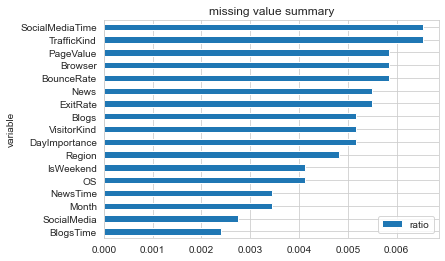

In [134]:
missing_values=train_data.isna().sum()
missing_values=pd.DataFrame({'variable':missing_values.index,'count':missing_values.values})
missing_values['ratio']=missing_values['count']/train_data.shape[0]

missing_values[missing_values['count']>0].sort_values(by=['ratio']).plot(kind='barh',
              x='variable',y='ratio',title='missing value summary',sort_columns=True)

Variable that's missing the highest no of data points is Social Media time and Traffic Kind. At Max data missing is only 0.6%. We will have 99.4% of the data to work after removing all Null value. Which is a good size data to Model



In [135]:
train_data = train_data.dropna()

#### 2. Converting Target Variable  <a id='Part_A2'></a>

In [136]:
train_data[dep_variable] =np.where(train_data[dep_variable]  == True, 1,0)

In [137]:
train_data[dep_variable].tail()

UniqueId
0x2371    0
0x2a08    0
0x17ee    0
0x2e34    0
0x1d70    0
Name: IsSale, dtype: int32

#### 3. Outlier removal of Numerical features  <a id='Part_A3'></a>

In [138]:
# remove the data points above and below three standard deviation

for i in range (len(Numerical_features)):
    upper_limit = train_data[Numerical_features[i]].mean() + 3*train_data[Numerical_features[i]].std()
    print (Numerical_features[i] + " upper limit -> " + str (upper_limit))

    lower_limit = train_data[Numerical_features[i]].mean() - 3*train_data[Numerical_features[i]].std()
    print (Numerical_features[i] + " lower limit -> " + str (lower_limit))
    train_data[(train_data[Numerical_features[i]]>upper_limit) | (train_data[Numerical_features[i]]<lower_limit)]




SocialMedia upper limit -> 13.330692658969399
SocialMedia lower limit -> -7.897158451241642
SocialMediaTime upper limit -> 652.7702978485565
SocialMediaTime lower limit -> -462.99700823494396
News upper limit -> 4.594760233943731
News lower limit -> -3.3831331513489062
NewsTime upper limit -> 477.26197178446574
NewsTime lower limit -> -392.0128466515342
Blogs upper limit -> 187.52220744992385
Blogs lower limit -> -112.48285970089867
BlogsTime upper limit -> 7491.433793808478
BlogsTime lower limit -> -4621.54491043379
BounceRate upper limit -> 0.13408140463105003
BounceRate lower limit -> -0.10250536776469052
ExitRate upper limit -> 0.15748793960436175
ExitRate lower limit -> -0.08874635860471591
PageValue upper limit -> 97.91270772096037
PageValue lower limit -> -69.55274529628831
DayImportance upper limit -> 0.5621775390907607
DayImportance lower limit -> -0.47327289534740735
IsWeekend upper limit -> 1.578511033285724
IsWeekend lower limit -> -1.0567102534204278


In [139]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SocialMedia,2821.000,2.717,3.538,-10.000,0.000,1.000,4.000,27.000
SocialMediaTime,2821.000,94.887,185.961,0.000,0.000,26.500,116.000,2720.500
News,2821.000,0.606,1.330,0.000,0.000,0.000,1.000,12.000
NewsTime,2821.000,42.625,144.879,0.000,0.000,0.000,0.000,1767.667
Blogs,2821.000,37.520,50.001,0.000,10.000,22.000,44.000,584.000
BlogsTime,2821.000,1434.944,2018.830,0.000,285.500,794.713,1758.250,27009.859
BounceRate,2821.000,0.016,0.039,0.000,0.000,0.001,0.012,0.200
ExitRate,2821.000,0.034,0.041,0.000,0.012,0.021,0.038,0.200
PageValue,2821.000,14.180,27.911,0.000,0.000,0.000,17.930,360.953
DayImportance,2821.000,0.044,0.173,0.000,0.000,0.000,0.000,1.000


#### 3. Visualization  <a id='Part_A3'></a>

### Visualization Continous Variable <a id='Part_A310'></a>

In [73]:
class Exploratory_Data_analysis:
    dep_variable = "IsSale"
    def __init__(self,data):
        # Load the data
        self.data = data
        self.No_of_Data_points()
        self.All_columns =  list(self.data.select_dtypes('number'))
        if self.dep_variable in self.All_columns: self.All_columns.remove(self.dep_variable)
    def No_of_Data_points(self):
        x= list(self.data.shape)
        return (x)
    def column_names(self):
        x= list(self.data.columns)
        return (x)
    def data_points_class(self):
        unique_class = list(self.data[self.dep_variable].unique())
        x= list(self.data[self.dep_variable].value_counts())
        for i,j in zip(range(0,len(unique_class)),range(0,len(x))):
            print(self.dep_variable + "->{}, No of data Points->{}".format(unique_class[i],x[j]))
        for i in range (0,len(x)):
            class_balance = (x[i]/len(self.data))* 100
            if (class_balance >= 90) and (class_balance <= 10):
                print("Class is Imbalance, Majority class will dominate predictions")
                break;
            if (class_balance >= 40) and (class_balance <= 60):
                print("Class is Balanced")
                #print (x[0]/len(self.data))* 100
                break;
            else:
                print("Class is okay balance")
                #print (int(x[0])/len(self.data))* 100
                break;
                
    def pair_plot(self):
        sns.set_style("whitegrid");
        #sns.pairplot(self.data, hue = self.dep_variable, height= 4,vars=['SocialMediaTime', 'NewsTime', 'BlogsTime', 'BounceRate', 'ExitRate'])
        sns.pairplot(self.data, hue = self.dep_variable, height= 4,vars= self.All_columns)

        plt.show()
        
    def hist_plot(self):
        All_columns = self.All_columns
        #All_columns = ['SocialMediaTime', 'NewsTime', 'BlogsTime', 'BounceRate', 'ExitRate']
        #All_columns.remove(self.dep_variable)
        #print(All_columns)
        for i in range (0,len(All_columns)):
            sns.FacetGrid(self.data, hue=self.dep_variable, height=6) \
    .map(sns.distplot, All_columns[i], kde=True) \
    .add_legend()
            plt.ylabel('Frequency')
            plt.title('Histogram of ' + All_columns[i] + ' of different ' + self.dep_variable )
            
    def pdf_plots(self):
        # Reference on subplots https://www.youtube.com/watch?v=4DnWYK88-E4
        All_columns = self.All_columns
        #All_columns.remove(self.dep_variable)
        class_varaible_list = list(self.data[self.dep_variable].unique())
        res=[]
        for i in All_columns:
            for j in class_varaible_list:
                res.append((i,j))
        res = list(enumerate(res))
        #print(res)
        plt.figure(figsize=(15,15))
        for i in res:
            #print(i)
            #print(i[1][0])
            plt.subplot(3,2,i[0]+1) # 3 is no of columns, 2 -> rows, i[0]-> position of the graph
            df0=self.data[self.data[self.dep_variable]==i[1][1]]
            counts, bin_edges = np.histogram(df0[i[1][0]], bins=10, density = True)

            #print(c)
            #print(i[1][0])
            #print (counts)
            #print(bin_edges)
            pdf = counts/(sum(counts))
            cdf = np.cumsum(pdf)
            #ax = fig.add_subplot(6,2,num)

            plt.plot(bin_edges[1:],pdf, 'r-')
            plt.plot(bin_edges[1:],cdf, 'b-')
            plt.title(self.dep_variable +'->'+ str(i[1][1]))
            plt.xlabel(i[1][0])
            plt.ylabel('Probability')
    def Statistics_Mean_Std(self):
        unique_class = list(self.data[self.dep_variable].unique())
        unique_class_list = []
        Measure_List = ['Mean','Stand_Dev']
        for i in unique_class:
            for j in Measure_List:
                unique_class_list.append(self.dep_variable + str(i)+'_'+ j)
        dx = pd.DataFrame( columns = unique_class_list)
        All_columns = self.All_columns
        #All_columns.remove(self.dep_variable)
        class_varaible_list = list(self.data[self.dep_variable].unique())
        for i in All_columns:
            res=[]
            for j in class_varaible_list:
                df0=self.data[self.data[self.dep_variable]==j]
                Mean_Var = np.mean(df0[i])
                res.append(Mean_Var)
                std_Var =  np.std(df0[i])
                res.append(std_Var)
            df2 = pd.DataFrame ([res],columns = unique_class_list, index=[i] )
            dx = dx.append(df2)
        return dx
    
    def Statistics_Median_Percentile_Quantile_IQR_MAD(self):
        unique_class = list(self.data[self.dep_variable].unique())
        unique_class_list = []
        Measure_List = ['Median','0_Quantile','25_Quantile', '50_Quantile','75_Quantile','90_Percentile',
                 'MAD' ]
        for i in unique_class:
            for j in Measure_List:
                unique_class_list.append(self.dep_variable + str(i)+'_'+ j)
        dx = pd.DataFrame( columns = unique_class_list)
        All_columns = self.All_columns
        #All_columns.remove(self.dep_variable)
        class_varaible_list = list(self.data[self.dep_variable].unique())
        for i in All_columns:
            res=[]
            perc = []
            for j in class_varaible_list:
                df0=self.data[self.data[self.dep_variable]==j]
                Median_Var = np.median(df0[i])
                res.append(str(Median_Var))
                Quantile = list(np.percentile(df0[i],np.arange(0, 100, 25)))
                res= res + Quantile
                ninety_perc = np.percentile(df0[i],90)
                res.append(str(ninety_perc))
                Mad = robust.mad(df0[i])
                res.append(Mad)
                
            df2 = pd.DataFrame ([res],columns = unique_class_list, index=[i] )
            dx = dx.append(df2)
        return dx
    def Box_Plot(self):
        
        All_columns = self.All_columns
        #All_columns.remove(self.dep_variable)
        res = list(enumerate(All_columns))
        plt.figure(figsize=(20,20))
        for i in res:
            plt.subplot(len(All_columns),1,i[0]+1) # 3 is no of columns, 2 -> rows, i[0]-> position of the graph
            sns.boxplot(x=self.dep_variable,y=i[1], data=self.data)
            plt.title(i[1] + ' distribution for different ' + self.dep_variable, fontdict=None, loc='center', pad=None)
            
    def violin_Plot(self):
        
        All_columns = self.All_columns
        #All_columns.remove(self.dep_variable)
        res = list(enumerate(All_columns))
        plt.figure(figsize=(15,15))
        for i in res:
            plt.subplot(len(All_columns),1,i[0]+1) # 3 is no of columns, 2 -> rows, i[0]-> position of the graph
            sns.violinplot(x=self.dep_variable,y=i[1], data=self.data)
            plt.title(i[1] + ' distribution for different ' +self.dep_variable, fontdict=None, loc='center', pad=None)

In [74]:
EDA = Exploratory_Data_analysis(train_data)

In [64]:
EDA.All_columns

['SocialMedia',
 'SocialMediaTime',
 'News',
 'NewsTime',
 'Blogs',
 'BlogsTime',
 'BounceRate',
 'ExitRate',
 'PageValue',
 'DayImportance',
 'IsWeekend']

### Class Imbalance <a id='Part_A300'></a>

In [65]:
data_points_class = EDA.data_points_class()

IsSale->1, No of data Points->1451
IsSale->0, No of data Points->1370
Class is Balanced


In [172]:
def cw3(df):  
    c0, c1,c2 = np.bincount(df)
    w0 = (1 / c0) * (len(df)) / 3
    w1 = (1 / c1) * (len(df)) / 3
    w2 = (1 / c2) * (len(df)) / 3
    return {0: w0, 1: w1, 2:w2}

In [173]:
def cw2(df):  
    c0, c1 = np.bincount(df)
    w0 = (1 / c0) * (len(df)) / 2
    w1 = (1 / c1) * (len(df)) / 2
   
    return {0: w0, 1: w1}

Class is Balanced. We don't need to do oversampling of minority or undersampling of majority class or change class weights

### Pair Plot

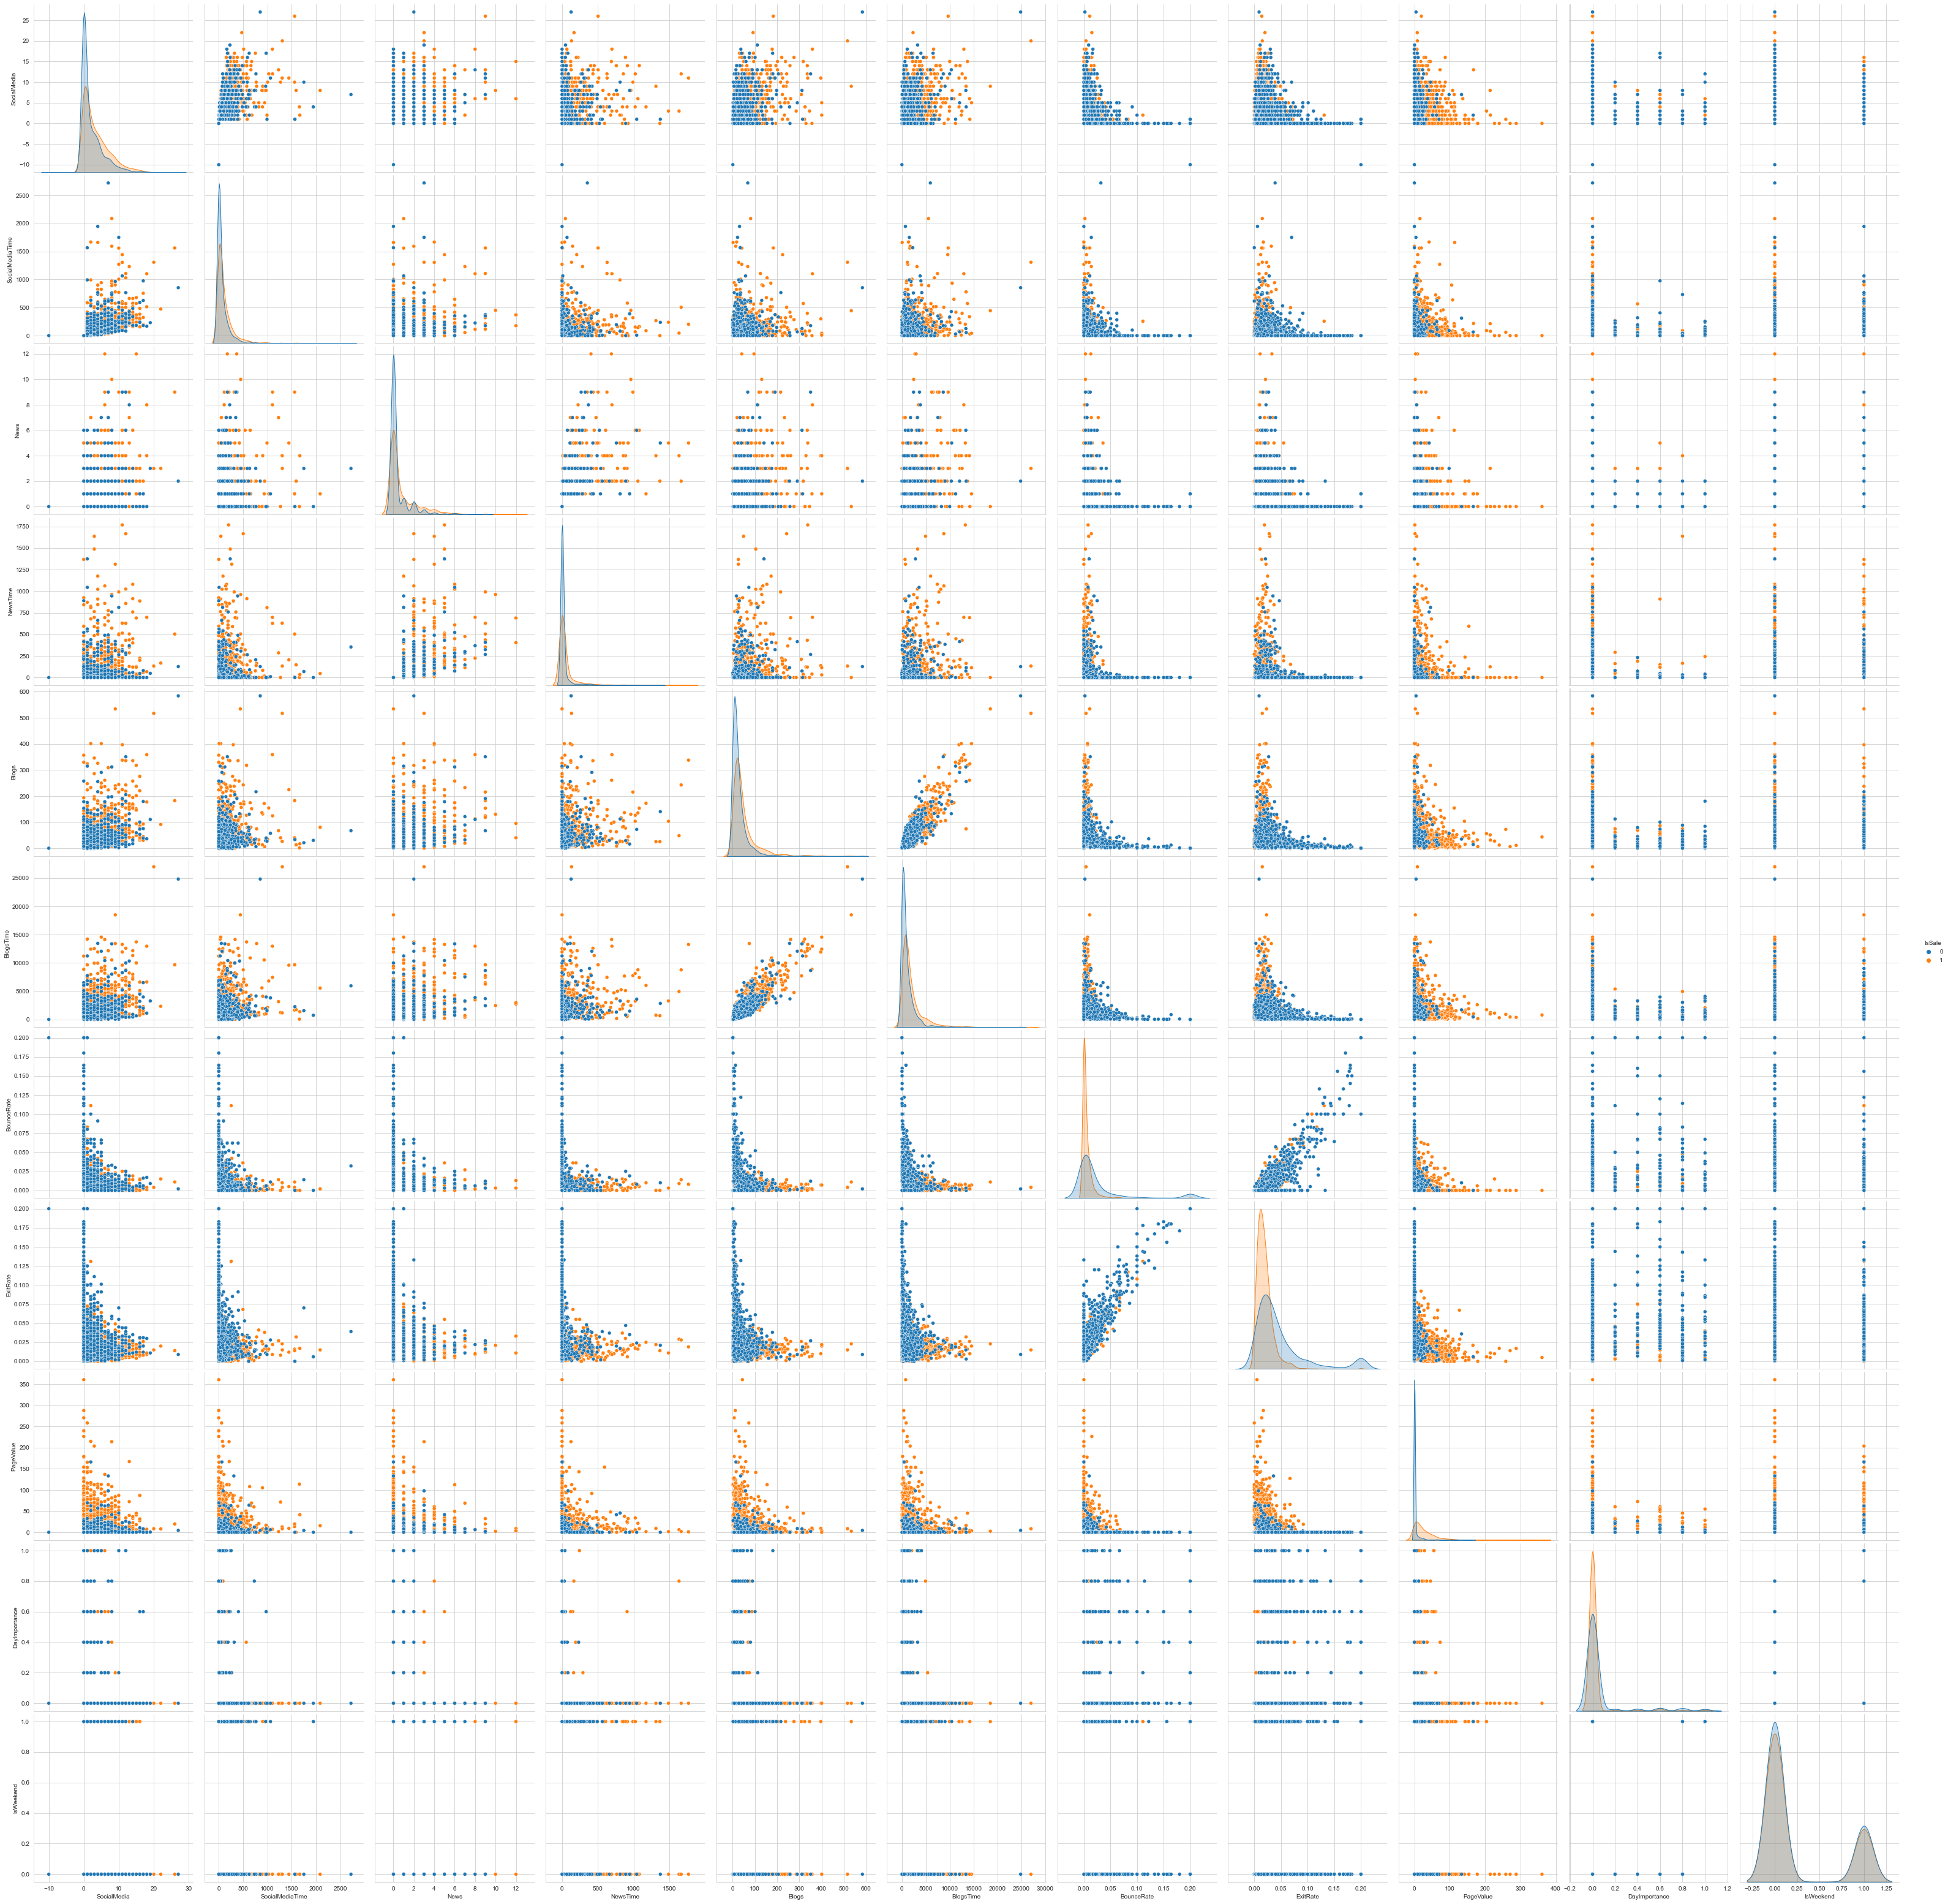

In [66]:
pair_plot = EDA.pair_plot()

<div class="alert alert-block alert-success"><b>Pair Plot Analysis:</b> 
Pair Plots helps to identify for what continuous variables the classes are distinguishable

<br/>

a) Bounce rate vs Exit rate - Clearly the lower the bounce rate -> higher the sales conversion <br/>
b) Higher the exit rate - less sales conversion <br/>
c) Other Variables for class distinction are mixed<br/>
</div>

### Histogram Plot

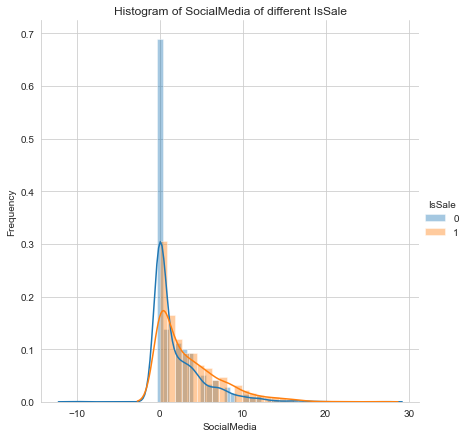

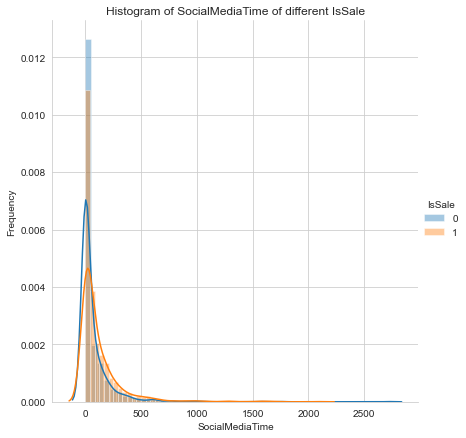

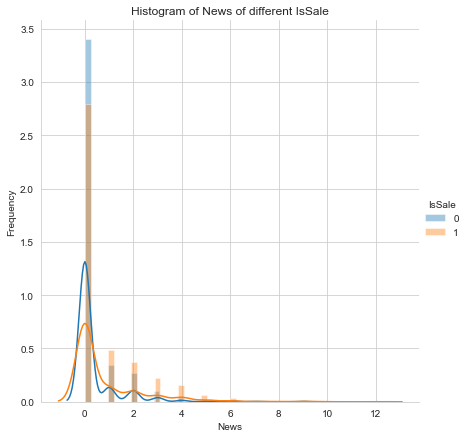

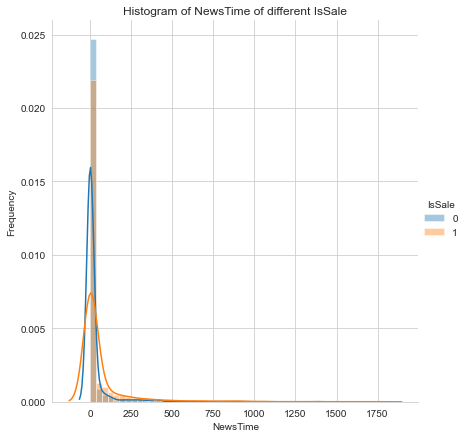

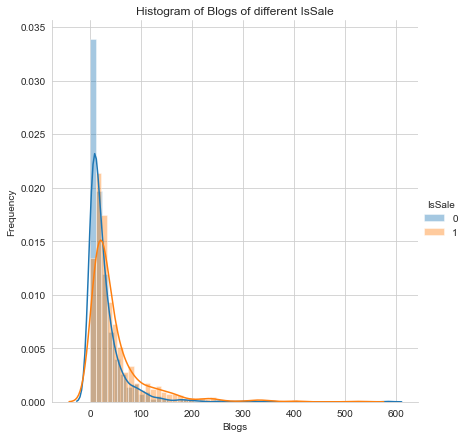

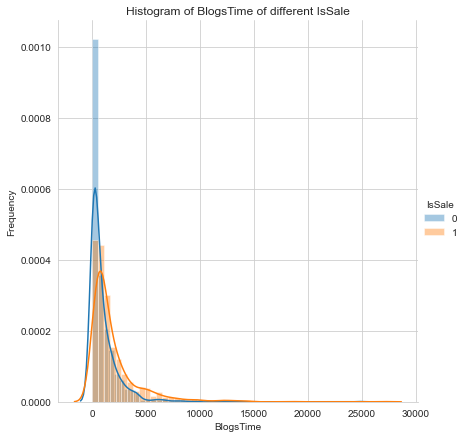

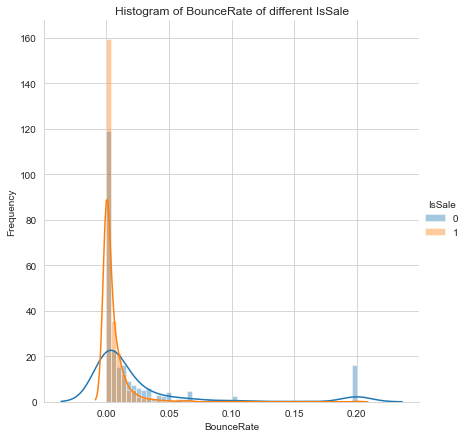

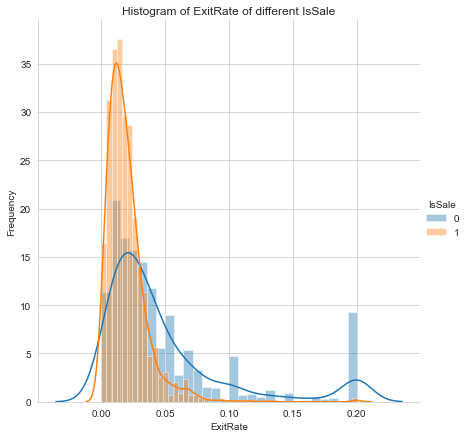

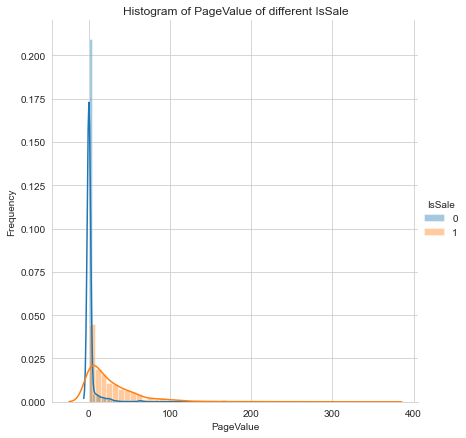

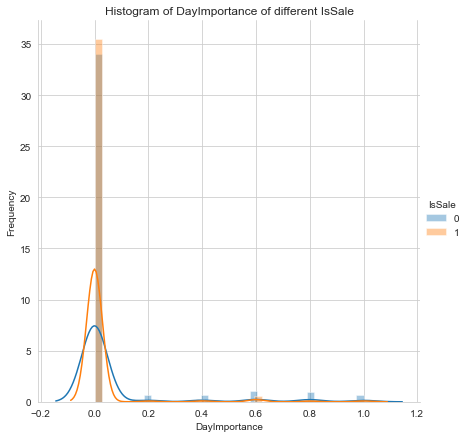

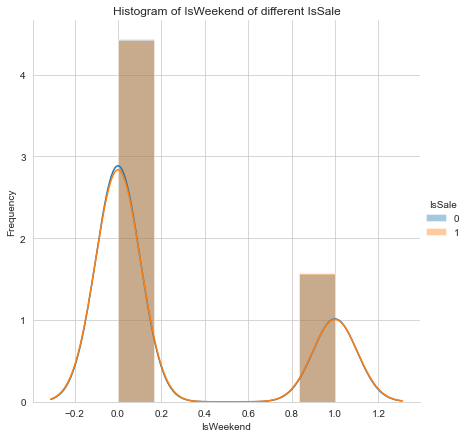

In [67]:
EDA.hist_plot()

<div class="alert alert-block alert-success"><b>Hist Plot Analysis:</b> 


<br/>

a) Blog time - Clearly the lower the blog time -> lower the sales conversion <br/>
b) Bounce rate - Clearly the lower the bounce rate -> Higher the sales conversion <br/>
c) News time - High overlap between the classes. hard to see whether news time convert to sales  <br/>
d) Social Media time - Less Social media time. Less conversion.   <br/>
</div>

### Mean and Std-dev

In [68]:
x= EDA.Statistics_Mean_Std()

In [69]:
x.head()

,IsSale1_Mean,IsSale1_Stand_Dev,IsSale0_Mean,IsSale0_Stand_Dev
SocialMedia,3.442,3.791,2.032,3.130
SocialMediaTime,120.954,204.277,70.274,162.978
News,0.821,1.543,0.402,1.050
NewsTime,63.188,181.730,23.209,93.996
Blogs,48.550,58.362,27.105,37.678


### Median, Percentile, Quantile, IQR, MAD

In [70]:
z= EDA.Statistics_Median_Percentile_Quantile_IQR_MAD()

In [71]:
z

,IsSale1_Median,IsSale1_0_Quantile,IsSale1_25_Quantile,IsSale1_50_Quantile,IsSale1_75_Quantile,IsSale1_90_Percentile,IsSale1_MAD,IsSale0_Median,IsSale0_0_Quantile,IsSale0_25_Quantile,IsSale0_50_Quantile,IsSale0_75_Quantile,IsSale0_90_Percentile,IsSale0_MAD
SocialMedia,2.0,0.000,0.000,2.000,5.000,9.0,2.965,0.0,-10.000,0.000,0.000,3.000,6.0,0.000
SocialMediaTime,51.854,0.000,0.000,51.854,155.223,309.0633000000001,76.879,0.0,0.000,0.000,0.000,82.195,198.75,0.000
News,0.0,0.000,0.000,0.000,1.000,3.0,0.000,0.0,0.000,0.000,0.000,0.000,2.0,0.000
NewsTime,0.0,0.000,0.000,0.000,26.000,191.74140000000023,0.000,0.0,0.000,0.000,0.000,0.000,41.0,0.000
Blogs,29.0,0.000,16.000,29.000,57.000,114.10000000000014,24.463,15.0,0.000,6.000,15.000,33.000,63.0,16.309
BlogsTime,1123.1375,0.000,543.020,1123.138,2287.674,4714.676900000001,1056.390,474.833,0.000,138.716,474.833,1271.845,2461.25,607.619
BounceRate,0.0,0.000,0.000,0.000,0.006,0.014,0.000,0.005,0.000,0.000,0.005,0.021,0.067,0.007
ExitRate,0.016,0.000,0.009,0.016,0.025,0.037,0.012,0.031,0.000,0.016,0.031,0.057,0.117,0.027
PageValue,16.853,0.000,3.844,16.853,38.205,63.59390000000001,23.922,0.0,0.000,0.000,0.000,0.000,1.457,0.000
DayImportance,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.2,0.000


### Box Plot

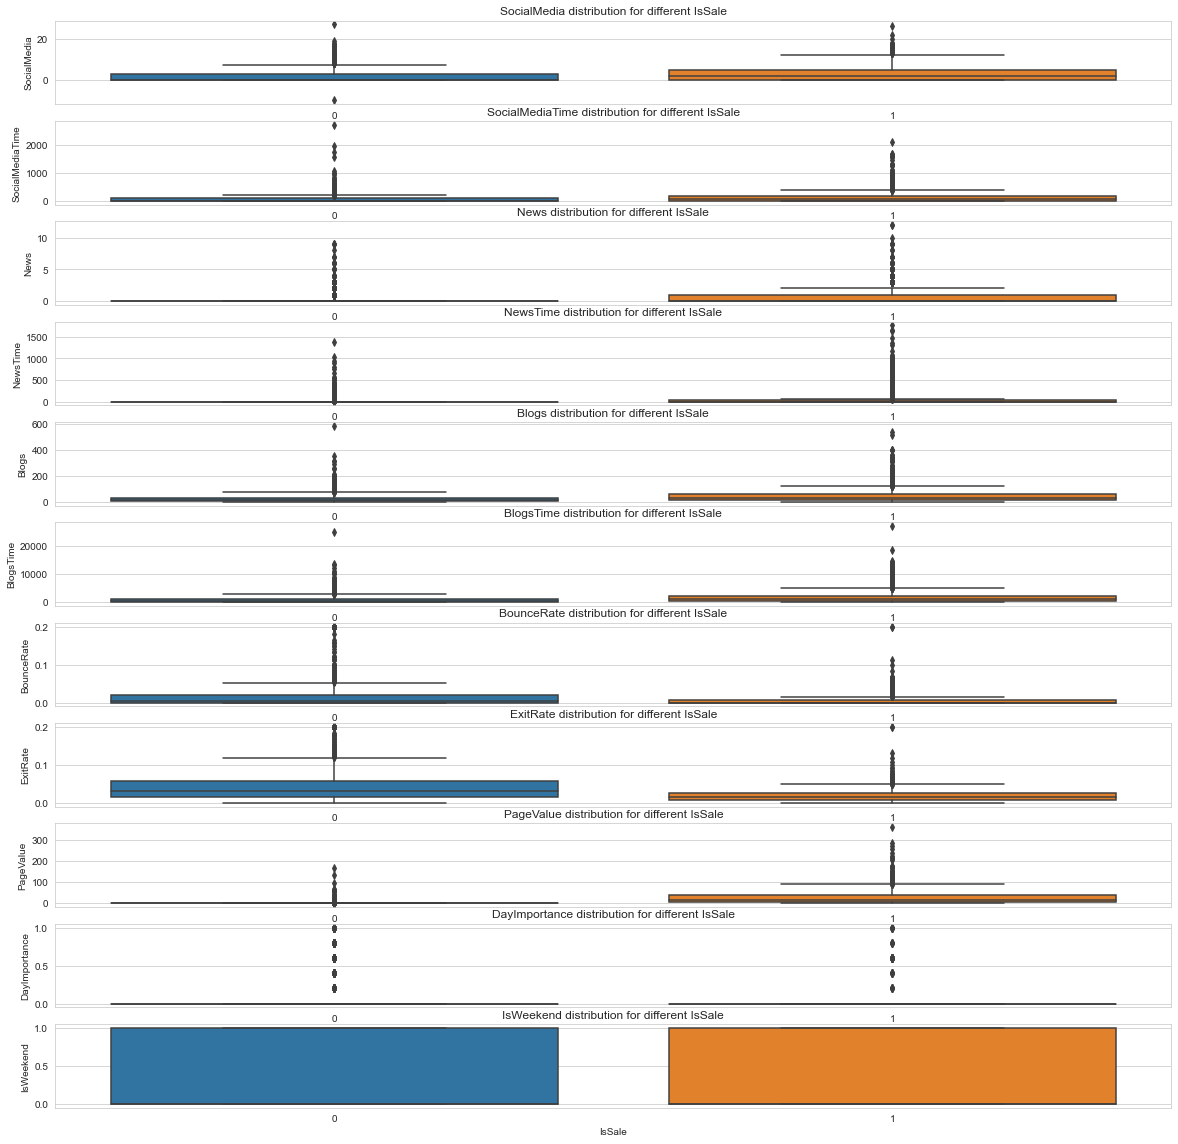

In [75]:
EDA.Box_Plot()

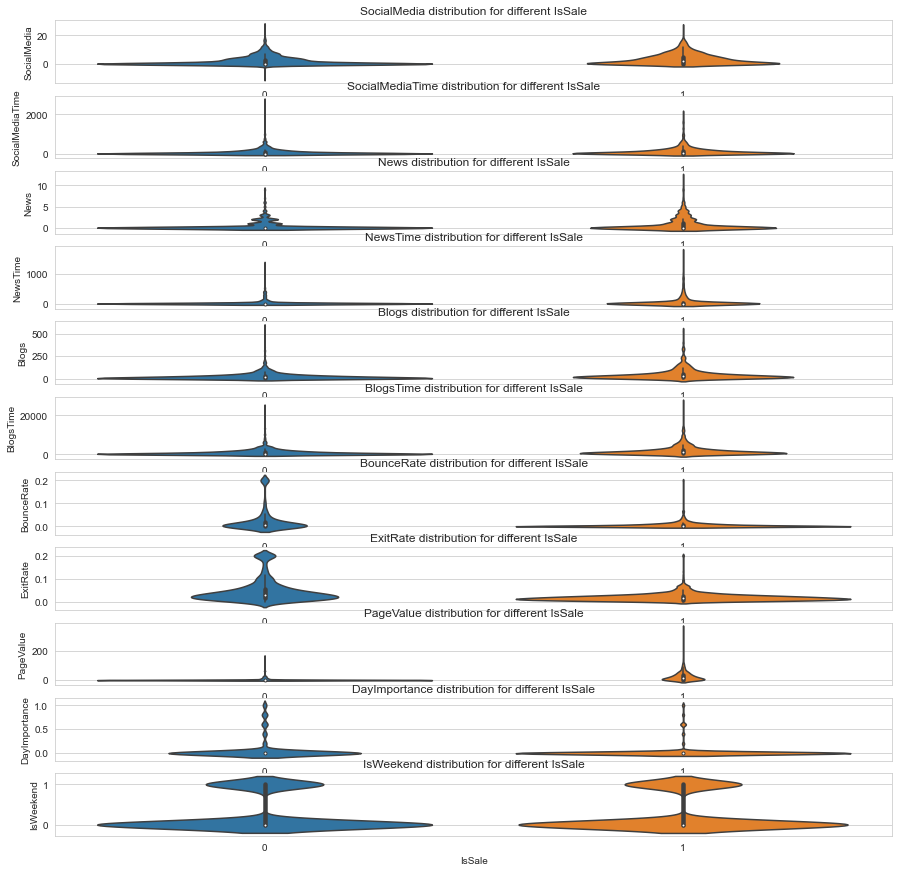

In [76]:
EDA.violin_Plot()

## Visualization Categorical variables <a id='Part_A311'></a>

### Explore the sales conversion Channel and platform in each region

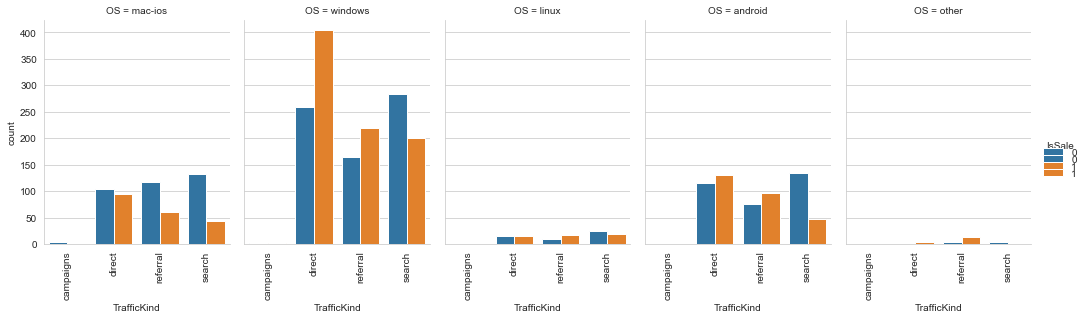

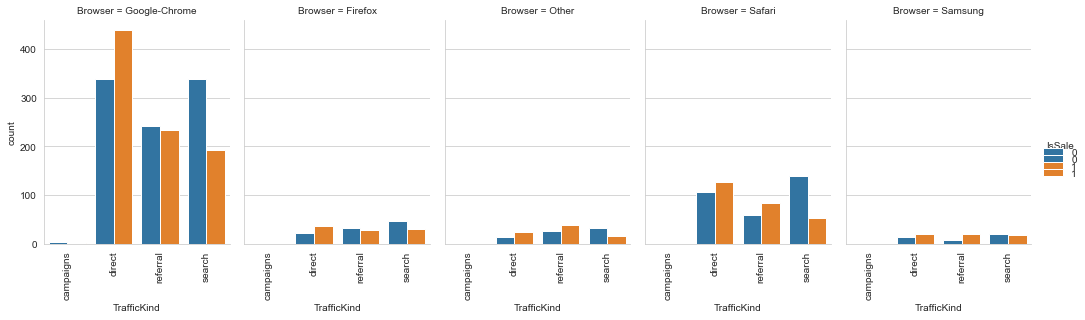

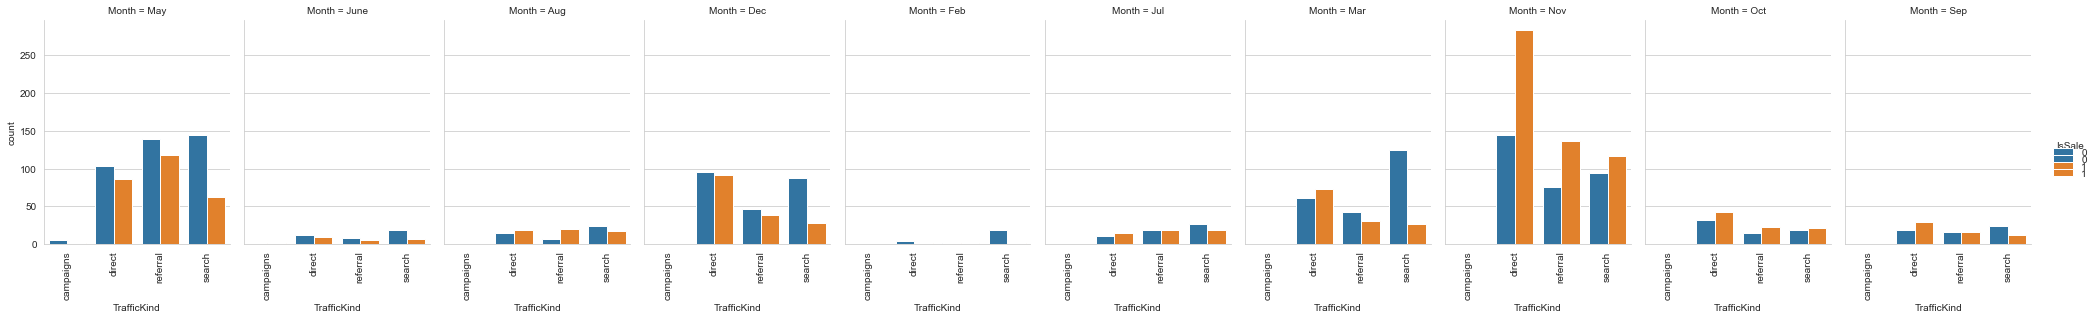

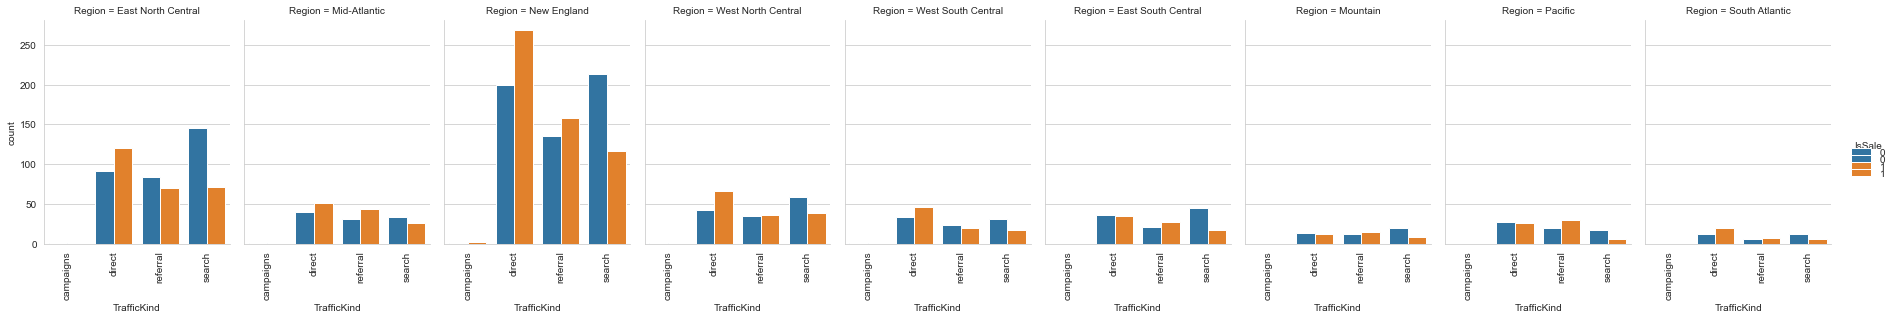

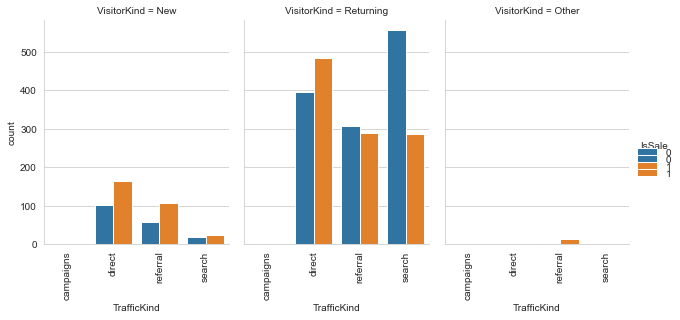

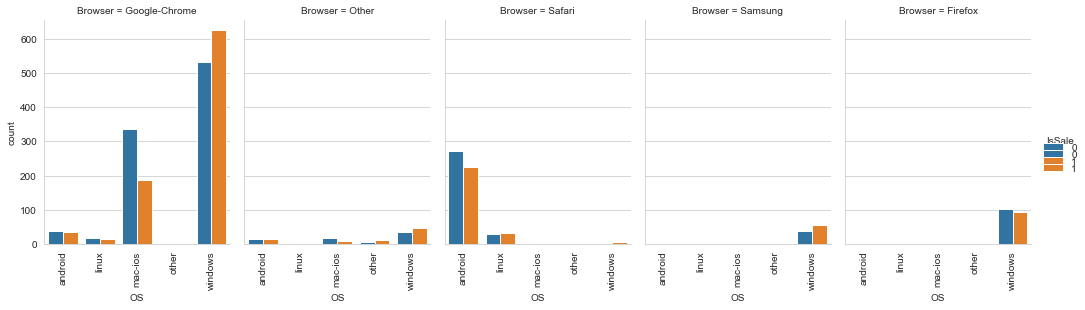

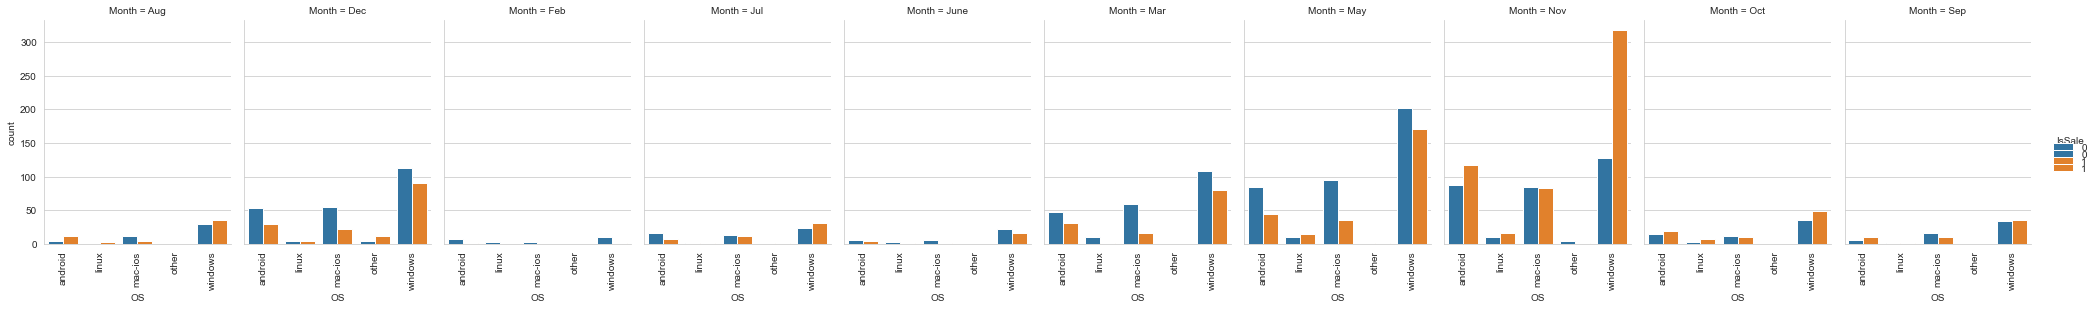

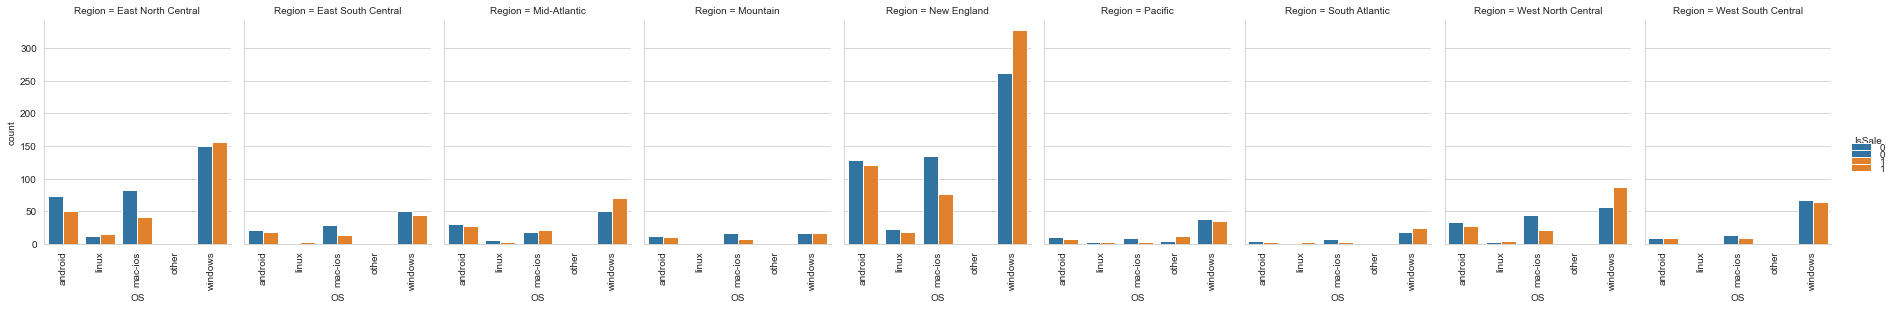

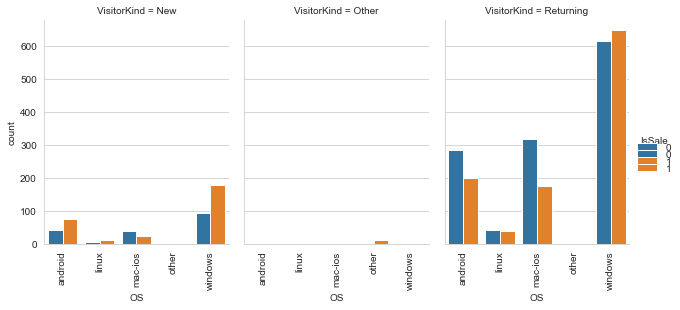

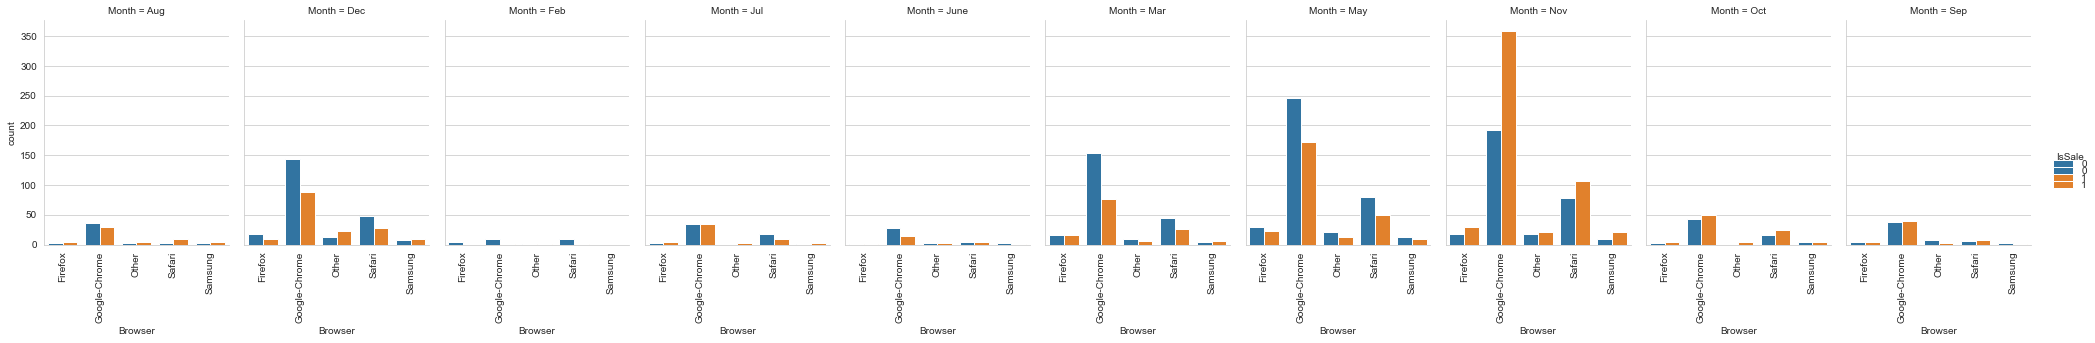

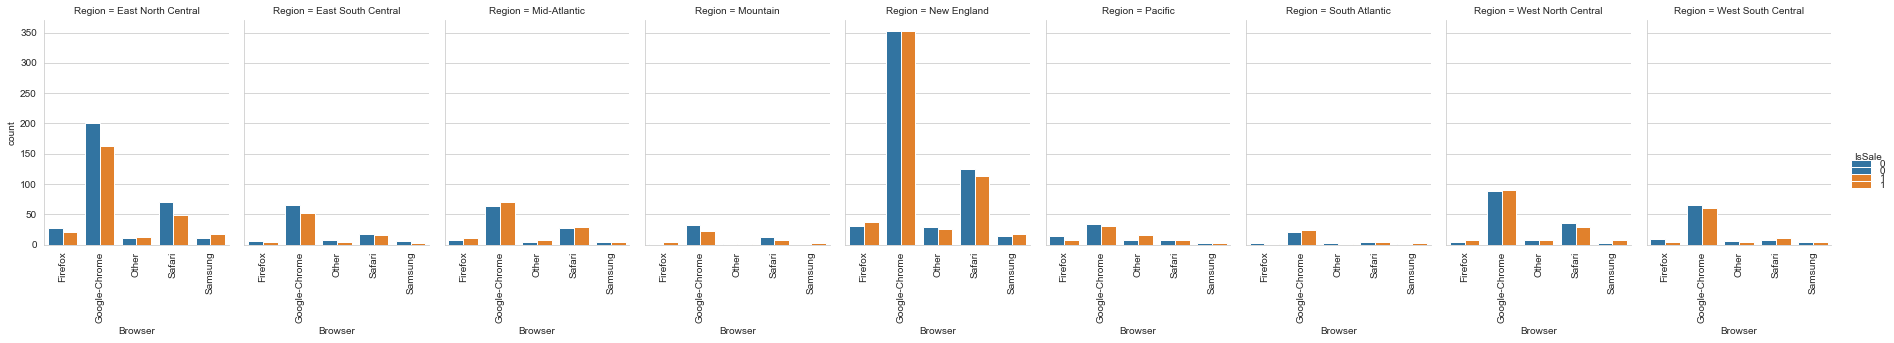

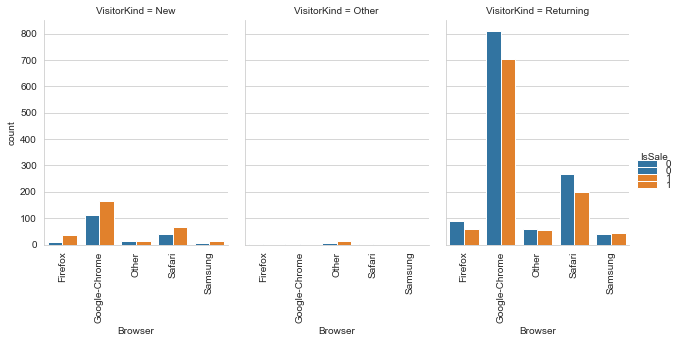

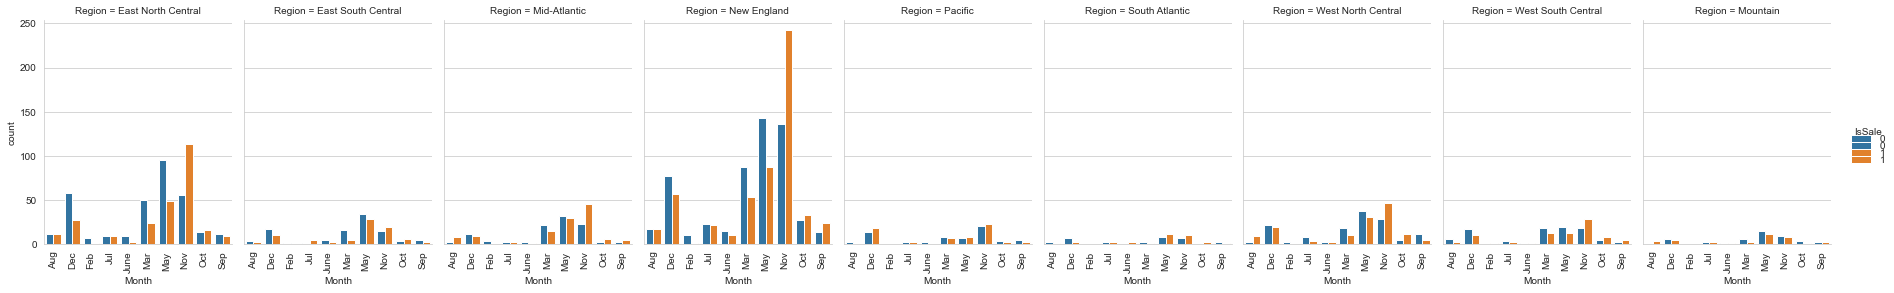

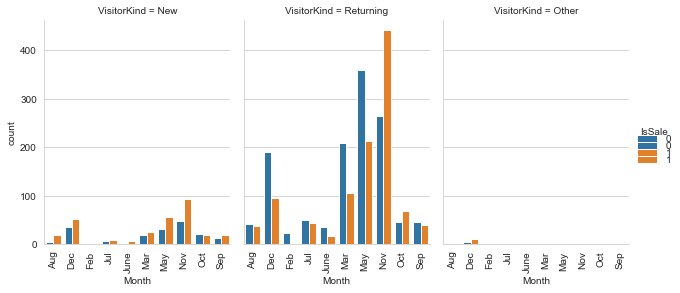

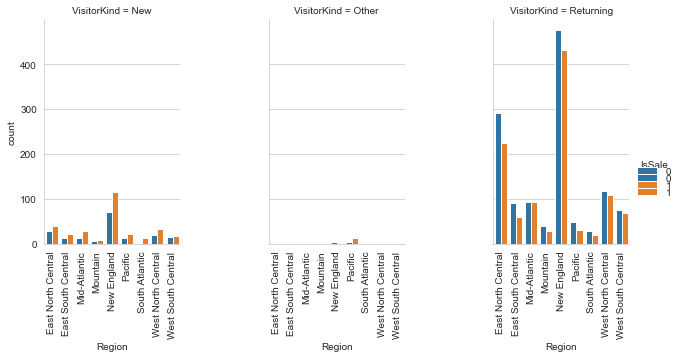

In [157]:
for i in range (len(categorical_features)):
    for j in range (i+1,len(categorical_features) ):
        res1=train_data.groupby([categorical_features[i], dep_variable, categorical_features[j]],as_index=False).size()

        res1=pd.DataFrame(res1)
        res1.reset_index(inplace=True)
        res1.head()
        res1.rename({'size':'count'},axis='columns',inplace=True)
        g = sns.catplot(x=categorical_features[i], y="count",
                        hue=dep_variable, col=categorical_features[j],
                         data=res1, kind="bar",
                         height=4, aspect=.7);
        g.add_legend()
        g.set_xticklabels(rotation=90)















Sales_conversion_channel = ['TrafficKind', 'OS', 'Browser', 'Region', 'IsSale']


res1=train_data.groupby(['OS', 'IsSale', 'Region'],as_index=False).size()

res1=pd.DataFrame(res1)
res1.reset_index(inplace=True)
res1.rename({0:'count'},axis='columns',inplace=True)


g = sns.catplot(x="OS", y="count",
                hue="IsSale", col="Region",
                 data=res1, kind="bar",
                 height=4, aspect=.7);
g.add_legend()
g.set_xticklabels(rotation=90)

res2=train_data.groupby([ 'OS', 'Browser',  'IsSale'],as_index=False).size()

res2=pd.DataFrame(res2)
res2.reset_index(inplace=True)
res2.rename({0:'count'},axis='columns',inplace=True)

g = sns.catplot(x="Browser", y="count",
                hue="IsSale", col="OS",
                 data=res2, kind="bar",
                 height=4, aspect=.7);
g.add_legend()
g.set_xticklabels(rotation=90)


res3=train_data.groupby([ 'TrafficKind', 'OS',  'IsSale'],as_index=False).size()

res3=pd.DataFrame(res3)
res3.reset_index(inplace=True)
res3.rename({0:'count'},axis='columns',inplace=True)

g = sns.catplot(x="TrafficKind", y="count",
                hue="IsSale", col="OS",
                 data=res3, kind="bar",
                 height=4, aspect=.7);
g.add_legend()
g.set_xticklabels(rotation=90)


res4=train_data.groupby([ 'TrafficKind',   'IsSale', 'Browser'],as_index=False).size()

res4=pd.DataFrame(res4)
res4.reset_index(inplace=True)
res4.rename({0:'count'},axis='columns',inplace=True)

g = sns.catplot(x= "TrafficKind", y="count",
                hue="IsSale", col=  "Browser",
                 data=res4, kind="bar",
                 height=4, aspect=.7);
g.add_legend()
g.set_xticklabels(rotation=90)

<div class="alert alert-block alert-success"><b>Sales conversion Channel Analysis:</b> 


<br/>
 <b>Region:</b> 

a) East North Central Region - Mac ios has lower conversion <br/>
b) Mid Atlantic- Windows has higher conversion <br/>
    
<b>OS:</b> <br/>
a) Windows - Google Chrome has higher conversion;whereas,Lower sales conversion on Android and Mac-ios <br/>
b) Windows - Direct channel has higher sales conversion  <br/>
    
<b>Browser:</b> <br/>
a) Google Chrome - Direct Channel has higher conversion;whereas,Lower sales conversion with Search <br/>
   
    

</div>

<Figure size 432x288 with 0 Axes>

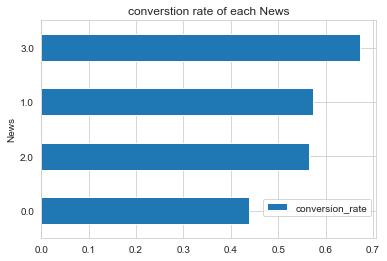

<Figure size 432x288 with 0 Axes>

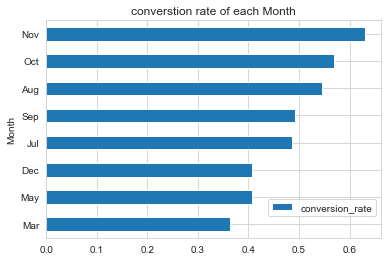

<Figure size 432x288 with 0 Axes>

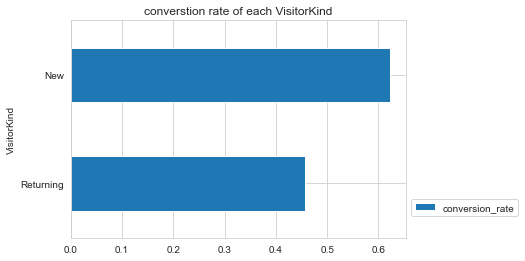

<Figure size 432x288 with 0 Axes>

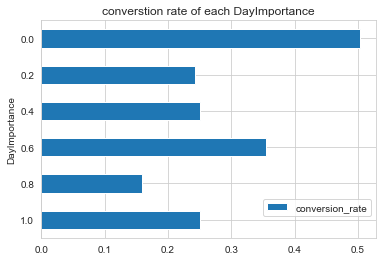

<Figure size 432x288 with 0 Axes>

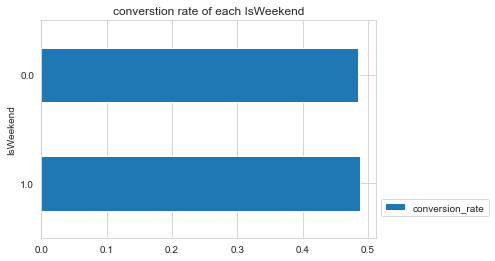

In [158]:
# function to plot the converstion rate against each level of a categorical variable
# if there are too many levels of the variable, only plot the levels with a frequency higher than the cutoff
def conversion_rate_per_category(data,variable,cutoff,sort=True):
    count=data.groupby([variable]).size()
    keys=count[count>cutoff].index.tolist()
    res=data[data[variable].isin(keys)].groupby([variable]).apply(lambda x: x[dep_variable].sum()/len(x))
    res=pd.DataFrame(res)
    res.reset_index(inplace=True)
    res.rename({0:'conversion_rate'},axis='columns',inplace=True)
    plt.figure()
    if sort:
        res.sort_values(by=['conversion_rate']).plot(kind='barh',
                        x=variable,y="conversion_rate",title='converstion rate of each '+variable)
    else:
        res.sort_values(by=variable,ascending=False).plot(kind='barh',
                        x=variable,y="conversion_rate",title='converstion rate of each '+variable)
    plt.legend(bbox_to_anchor=(1, 0.2))

#only change this down column names
conversion_rate_per_category(train_data,'News',100)
conversion_rate_per_category(train_data,'Month',100)
conversion_rate_per_category(train_data,'VisitorKind',100,False)
conversion_rate_per_category(train_data,'DayImportance',10,False)
conversion_rate_per_category(train_data,'IsWeekend',0,False)

<div class="alert alert-block alert-success"><b>Conversion rate categorical varaible:</b> 


<br/>
 

a) News marked "3" has higher conversion rate <br/>
b) Nov Month has highest conversion followed by Oct and August <br/>
      --Should check the seasonality and events (Thanksgiving, Blackfriday, Back to school etc..) <br/>
c) New Users has higher conversion rate <br/>
d) Day 0 has higher importance and conversion rate <br/>
      --Should see if there are higher promotions run on that day by marketing
    

   
    

</div>

#### 1. Data preprocessing <a id='Part_B1'></a>

In [ ]:
train_data.columns

### One hot encoding of categorical values

In [159]:
df2 = pd.get_dummies(data=train_data, columns=categorical_features)
df2.columns

Index(['SocialMedia', 'SocialMediaTime', 'News', 'NewsTime', 'Blogs',
       'BlogsTime', 'BounceRate', 'ExitRate', 'PageValue', 'DayImportance',
       'IsWeekend', 'IsSale', 'TrafficKind_campaigns', 'TrafficKind_direct',
       'TrafficKind_referral', 'TrafficKind_search', 'OS_android', 'OS_linux',
       'OS_mac-ios', 'OS_other', 'OS_windows', 'Browser_Firefox',
       'Browser_Google-Chrome', 'Browser_Other', 'Browser_Safari',
       'Browser_Samsung', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'Region_East North Central', 'Region_East South Central',
       'Region_Mid-Atlantic', 'Region_Mountain', 'Region_New England',
       'Region_Pacific', 'Region_South Atlantic', 'Region_West North Central',
       'Region_West South Central', 'VisitorKind_New', 'VisitorKind_Other',
       'VisitorKind_Returning'],
      dtype='object')

In [160]:
df2.sample(5)

,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,DayImportance,IsWeekend,IsSale,TrafficKind_campaigns,TrafficKind_direct,TrafficKind_referral,TrafficKind_search,OS_android,OS_linux,OS_mac-ios,OS_other,OS_windows,Browser_Firefox,Browser_Google-Chrome,Browser_Other,Browser_Safari,Browser_Samsung,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Region_East North Central,Region_East South Central,Region_Mid-Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central,VisitorKind_New,VisitorKind_Other,VisitorKind_Returning
UniqueId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0x2a3c,1.000,30.250,0.000,0.000,13.000,392.188,0.000,0.005,60.263,0.000,0.000,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
00xc74,6.000,51.000,0.000,0.000,26.000,536.000,0.007,0.012,0.000,0.000,0.000,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
00x8ad,2.000,2.000,0.000,0.000,0.000,0.000,0.100,0.100,0.000,0.000,1.000,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
00xbf0,0.000,0.000,0.000,0.000,17.000,1356.000,0.000,0.035,0.000,0.600,0.000,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
0x255b,11.000,347.792,0.000,0.000,91.000,2434.145,0.002,0.019,10.519,0.000,0.000,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [161]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[Numerical_features] = scaler.fit_transform(train_data[Numerical_features])

In [162]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

SocialMedia: [0.35135135 0.54054054 0.37837838 0.27027027 0.2972973  0.7027027
 0.32432432 0.45945946 0.64864865 0.43243243 0.72972973 0.48648649
 0.56756757 0.40540541 0.51351351 0.67567568 0.62162162 0.59459459
 0.81081081 0.86486486 0.75675676 0.97297297 0.78378378 0.
 1.        ]
SocialMediaTime: [0.03228561 0.36966256 0.02242235 ... 0.07765117 0.11866679 0.13416651]
News: [0.         0.16666667 0.08333333 0.25       0.33333333 0.5
 1.         0.41666667 0.58333333 0.75       0.83333333 0.66666667]
NewsTime: [0.         0.07071468 0.03620591 0.00810843 0.00509146 0.03394304
 0.37016757 0.02206298 0.35583625 0.2541955  0.05826889 0.22854983
 0.14878368 0.04356024 0.02300603 0.19517251 0.01668866 0.23024699
 0.04582311 0.16858379 0.13325474 0.0096172  0.01470865 0.19036391
 0.00735433 0.21723549 0.13775219 0.20874972 0.03450876 0.0534603
 0.16971522 0.02376013 0.01357722 0.03111446 0.01584009 0.00396002
 0.07863472 0.47803121 0.01159721 0.0342259  0.18063357 0.052046
 0.16557643 0.34

In [163]:
X = df2.drop(dep_variable,axis='columns')
y = df2[dep_variable]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

#### 2. Built Models <a id='Part_B2'></a>

In [175]:
# baseline model - decision tree
# decisiton tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42,  class_weight=cw2(y_train))
tree.fit(X_train, y_train)
y_pred = tree.predict(X_train)

# training set performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X_train, y_train,
                         scoring="roc_auc", cv=10)
print('traing auc score:', scores.mean())

# testing set performance
y_pred = tree.predict(X_test)
print('testing auc score:', roc_auc_score(y_test,y_pred))

traing auc score: 0.7819670544270086
testing auc score: 0.8025281535787167


In [177]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400,max_features="auto",  class_weight=cw2(y_train))
rf.fit(X_train, y_train)

# training set performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train,
                         scoring="roc_auc", cv=10)
print('traing auc score:', scores.mean())

# testing set performance
y_pred = rf.predict(X_test)
print('testing auc score:', roc_auc_score(y_test,y_pred))

traing auc score: 0.9210014793241339
testing auc score: 0.8601831557201522


In [191]:
# adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(n_estimators=500)
adab.fit(X_train, y_train)

# training set performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(adab, X_train, y_train,
                         scoring="roc_auc", cv=10)
print('traing auc score:', scores.mean())

# testing set performance
y_pred = adab.predict(X_test)
print('testing auc score:', roc_auc_score(y_test,y_pred))

TypeError: __init__() got an unexpected keyword argument 'class_weight'

In [200]:
# Xgboost 
#!pip install xgboost

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)
print(class_weights)
class_weight=cw2(y_train)
print(class_weight)
#class_weight=cw2(y_train)
import warnings
warnings.filterwarnings("ignore")

from xgboost import XGBClassifier
XGB = XGBClassifier(n_estimators=500,class_weight=cw2(y_train) , random_state = 49, verbosity = 0)
XGB.fit(X_train, y_train)
scores = cross_val_score(XGB, X_train, y_train,
                         scoring="roc_auc", cv=10)
print('traing auc score:', scores.mean())

# testing set performance
y_pred = adab.predict(X_test)
print('testing auc score:', roc_auc_score(y_test,y_pred))


[0.9825784  1.01805054]
{0: 0.9825783972125436, 1: 1.0180505415162455}
traing auc score: 0.9125377118329064
testing auc score: 0.8440405109213213


#### 3. Parameter Tuning <a id='Part_B3'></a>

The random forest model leads the best testing auc score. Use Grid-Search for further prameter tuning.

In [183]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [300, 400], 
               'max_features': [12,14,16]}]

rf = RandomForestClassifier(random_state=42,class_weight=cw2(y_train))

grid_search = GridSearchCV(rf, param_grid, cv=10,
                           scoring='roc_auc', return_train_score=True)
grid_search.fit(X_train, y_train)
print("best parameter based on the toy grid search:",grid_search.best_params_)

best parameter based on the toy grid search: {'max_features': 12, 'n_estimators': 300}


In [168]:
feature_importances = grid_search.best_estimator_.feature_importances_

feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

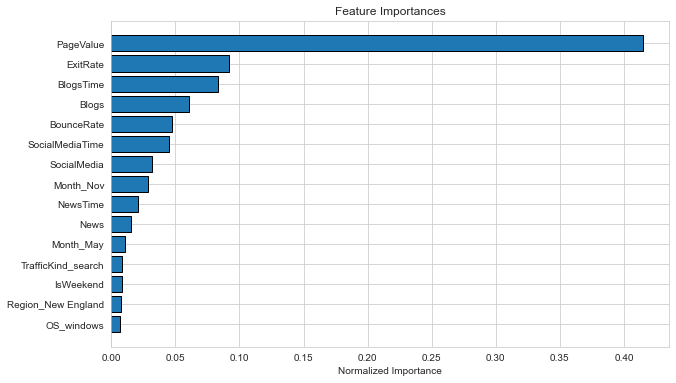

,index,feature,importance,importance_normalized
0,8,PageValue,0.415,0.415
1,7,ExitRate,0.092,0.092
2,5,BlogsTime,0.083,0.083
3,4,Blogs,0.061,0.061
4,6,BounceRate,0.048,0.048
5,1,SocialMediaTime,0.045,0.045
6,0,SocialMedia,0.032,0.032
7,32,Month_Nov,0.029,0.029
8,3,NewsTime,0.021,0.021
9,2,News,0.016,0.016


In [169]:
def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

plot_feature_importances(feature_importances_df)

In [170]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       303
           1       0.85      0.82      0.83       262

    accuracy                           0.85       565
   macro avg       0.85      0.84      0.84       565
weighted avg       0.85      0.85      0.85       565



# Part C  <a id='Part_C'></a>

Based on model result above, we might be able to leverage the following key takeaway:

The most three importance features are: 
   - Page value
   - Exit Rate
   - Blog Time

# Part D  <a id='Part_D'></a>

In [ ]:
out_of_sample_data = pd.read_csv("test.csv", index_col=0)

In [ ]:
out_of_sample_data.head()

In [ ]:
out_of_sample_data = out_of_sample_data.dropna()

In [ ]:
df2_out_of_sample = pd.get_dummies(data=out_of_sample_data, columns=categorical_features)
df2_out_of_sample.columns
df2_out_of_sample[Numerical_features] = scaler.fit_transform(out_of_sample_data[Numerical_features])
IsSale = grid_search.predict_proba(df2_out_of_sample)

In [ ]:
IsSale[1][1]

In [ ]:
Empty_list = []

In [ ]:
for i in range (len(IsSale)):
    if IsSale [i][0] >= IsSale [i][1]:
        Empty_list.append(IsSale [i][0])
    else:
        Empty_list.append(IsSale [i][1])
        
        
    

In [ ]:
out_of_sample_data['IsSale'] = Empty_list

In [ ]:
out_of_sample_data

In [ ]:
Sample_submission = out_of_sample_data['IsSale']

In [ ]:
Sample_submission.head()

# Part E  <a id='Part_E'></a>

<div class="alert alert-block alert-success"><b>Process Improvement:</b> 
<br/>

a) Create Pipelines to remove redudancy in the coding<br/>
b) Use SHAP instead of Feature importance to see the positive and negative variance <br/>
c) Further tune the RF model and deep dive into the train and test accuracy of the best parameters <br/>
d) Use Feature Engg to create more features and see if we can further improve the model accuracy <br/>
e) Explore other Models like Xgboost and NN 
</div>

# Visualization, Modeling, Machine Learning

Build a model that can predict the probability that a visit can be converted to a transaction and identify how different features influence the decision. Please explain the findings for technical and non-technical audiences using comments and visualizations, if appropriate. Do comment on any actions taken or why a model was choosen over another.
- **Build an optimized model that effectively solves the business problem**
- **The model will be evaluated on the basis of roc_auc_score**
- **Read the test.csv file and prepare features for testing**


# Possible Improvements

If you had more time to improve your model, what steps would you take?

- **Submit the predictions on the test dataset using your optimized model**

    For each record in the test set (`test.csv`), predict the probability of the `IsSale` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **UniqueId**
   - **IsSale**

In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)